In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#df = pd.read_csv('BostonHousing.csv')
df = pd.read_excel('BostonHousing.xlsx')
df.head(10)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


There are 14 attributes in each case of the dataset. They are:

CRIM - per capita crime rate by town

ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS - proportion of non-retail business acres per town.

CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

NOX - nitric oxides concentration (parts per 10 million)

RM - average number of rooms per dwelling

AGE - proportion of owner-occupied units built prior to 1940

DIS - weighted distances to five employment centres

RAD - index of accessibility to radial highways

TAX - full-value property-tax rate per $10,000

PTRATIO - pupil-teacher ratio by town

B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT - % lower status of the population

MEDV - Median value of owner-occupied homes in $1000’

In [49]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


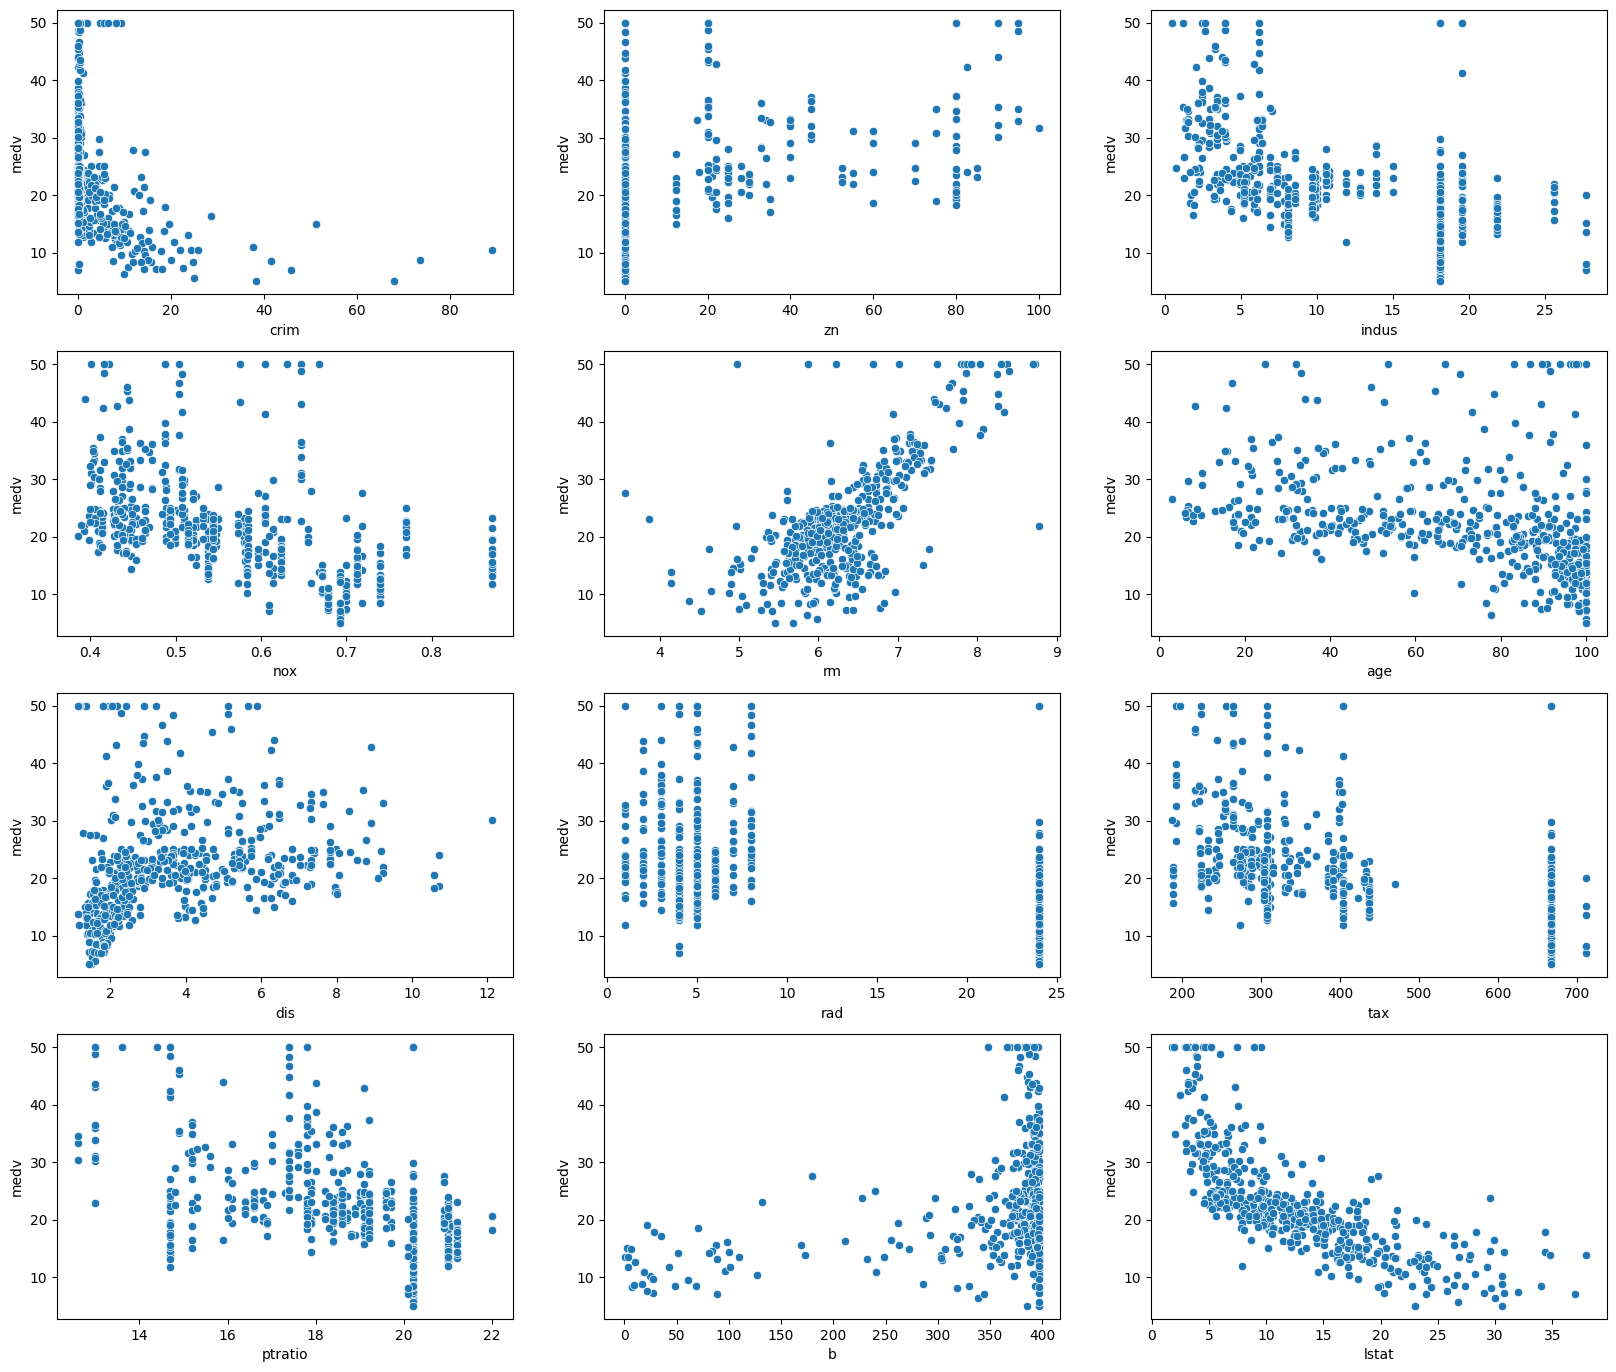

In [33]:
df_w_o_chas = df.loc[:, df.columns != "chas"]
dep_var = 'medv'

fig, axes = plt.subplots(4, 3, figsize = (20,17))

for idx, col in enumerate(df_w_o_chas):
    if col != dep_var:
        sns.scatterplot(df, x = col, y = dep_var, ax = axes[idx // 3, idx % 3])

plt.show()

MEDV with:
 - CRIM - looks like negative correlation. Meaning that higher crime is related with lower prices. Also a distribution of the prices in areas with lower crime is wider. However, we have a few observations with from higher crime rates areas

- *ZN - does not look like have any influence*

- INDUS - looks like negative correlation. Meaning that more industrial zones are related with lower prices

- NOX - looks like negative correlation. Meaning that more industrial zones are related with lower prices

- **RM - looks like a strong correlation meaning that more rooms are related with higher prices**

- AGE - looks like negative correlation. Meaning that zones with older buildings are related with lower prices

- **DIS - looks like parabolic relation with rapid growth in prices increasing distance to 3 and then maintaning the level**

- *RAD - does not look like have any influence. Also there is lack of observations for indeces in a range 7-24*

- TAX - looks like negative correlation. Meaning that higher taxes are related with lower prices

- PTRATIO - looks like negative correlation. Meaning that more students for one teacher are related with lower prices

- *B - does not look like have any influence. Also there is lack of observations for low values of B*

- **LSTAT - looks like strong negative correlation. Meaning that higher share of lower status population is related with lower prices**


In [34]:
df['chas'].value_counts()

chas
0    471
1     35
Name: count, dtype: int64

Too few observations for houses along the river. The results of the sample could be biased.

<Axes: xlabel='chas', ylabel='medv'>

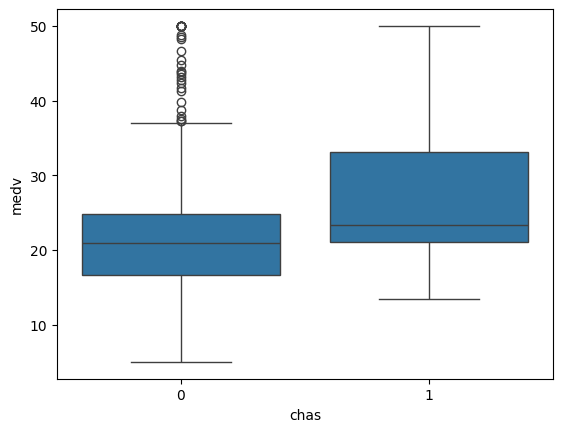

In [35]:
sns.boxplot(df, x = "chas", y = dep_var)

A distribution of prices is wider for houses around river. Maximum and minimum prices are also higher.<br>
But we can't make a final conclusion with existing sample.

In [43]:
corr_model = df_w_o_chas.corr()
print(corr_model["medv"])

crim      -0.388305
zn         0.360445
indus     -0.483725
nox       -0.427321
rm         0.695360
age       -0.376955
dis        0.249929
rad       -0.381626
tax       -0.468536
ptratio   -0.507787
b          0.333461
lstat     -0.737663
medv       1.000000
Name: medv, dtype: float64


Created a correlation table with coefficients between medium price and other variables. <br>
We can define the strongest relatios are with **lstat** and **rm** variables. <br>
Also we can detect medium correlation with **indus**, **tax** and **ptratio**


<Axes: >

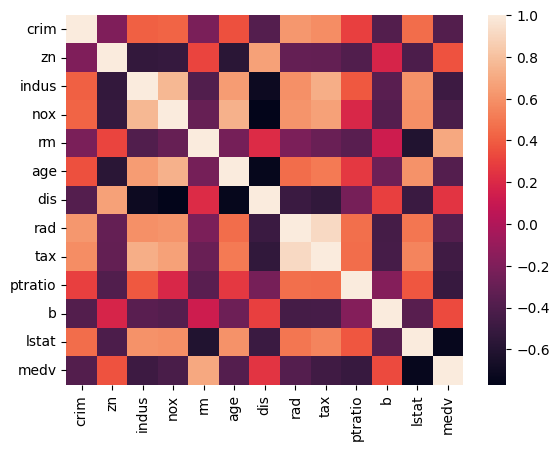

In [42]:
sns.heatmap(corr_model)

The heatmap hep identify more interesting relations. Here are listed some additional insights:
- criminal has medium-strong positive relation with access to radial highways and tax level
- industrial zones tend to be located in older areas, have higher nitric oxidants concentration and higher taxes. Also employments centers tend to be located around those zones. Those zones have higher shares of lower status of population
- tax values have a very strong positive correlation with access to radial highways

